# ERCEMAPI 2022

## Minicurso **Introdução às Redes Neurais Profundas**

## Parte II - Redes Neurais Clássias (em Keras) 

Prof. Josenildo C. da Silva (IFMA)

Prof. Raimundo Osvaldo Vieira (IFMA)


## Setup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
tf.__version__ # atual 2.8.2

'2.8.2'

In [3]:
keras.__version__ # atual 2.8.0

'2.8.0'

## Redes Neurais Clássicas em Keras

## Exemplo com Fashion MNIST (Geron, cap. 10)

### Fashion mnist dataset

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(f"Treino: {X_train_full.shape}")
print(f"Teste: {X_test.shape}")

Treino: (60000, 28, 28)
Teste: (10000, 28, 28)


Separamos 50k imagens para treino

In [6]:
X_train = X_train_full[:50000] / 255.0
y_train = y_train_full[:50000]

Separamos 10k imagens para validação

In [7]:
X_valid = X_train_full[50000:] / 255.0  
y_valid = y_train_full[50000:]

In [8]:
print(f"Treino: {X_train.shape}")
print(f"Teste: {X_test.shape}")
print(f"Validação: {X_valid.shape}")

Treino: (50000, 28, 28)
Teste: (10000, 28, 28)
Validação: (10000, 28, 28)


In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

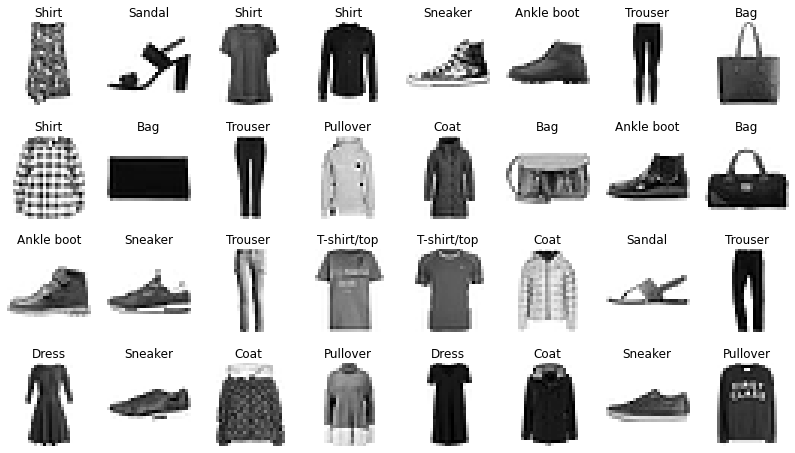

In [10]:
fig,axes = plt.subplots(nrows=4,ncols=8,figsize=(14,8))
for ax_r in axes:
  for ax in ax_r:
    r = random.randint(0,len(y_train))
    some_image =X_train[r].reshape(28,28)
    ax.imshow(X=some_image, cmap = mpl.cm.binary, interpolation="nearest")
    ax.set_title(class_names[y_train[r]])
    ax.axis("off")
#plt.axis("off")
plt.show()

### Modelo

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Alternativa ao Flatten() seria utilizar InputLayer(shape=[28,28])

Para uma lista completa de funções de ativação do Keras veja https://keras.io/activations/

O modelo também poderia ser criado passando uma lista de camadas

```
model = keras.models.Sequential([
   keras.layers.Flatten(input_shape=[28, 28]),
   keras.layers.Dense(300, activation="relu"),
   keras.layers.Dense(100, activation="relu"),
   keras.layers.Dense(10, activation="softmax")
])
```



In [13]:
x = np.linspace(-10,10,100)
y = keras.activations.relu(x)

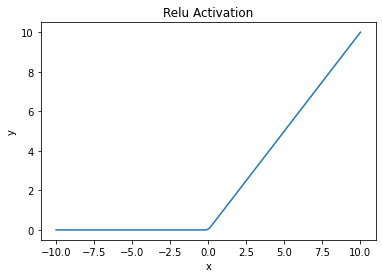

In [14]:
plt.plot(x,y)
plt.title("Relu Activation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [15]:
x = tf.constant([[2.1,2.4,5.3,2.5,3.2,4.7]])
y = keras.activations.softmax(x)
y.numpy()

array([[0.02230046, 0.03010248, 0.54708683, 0.03326838, 0.06699429,
        0.30024752]], dtype=float32)

In [16]:
y.numpy().sum()

1.0

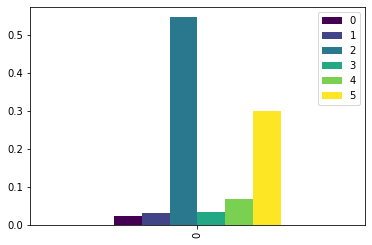

In [17]:
pd.DataFrame(y.numpy()).plot.bar(cmap='viridis')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.layers

In [20]:
model.layers[1].name

'dense'

In [21]:
ws, bs = model.layers[1].get_weights()

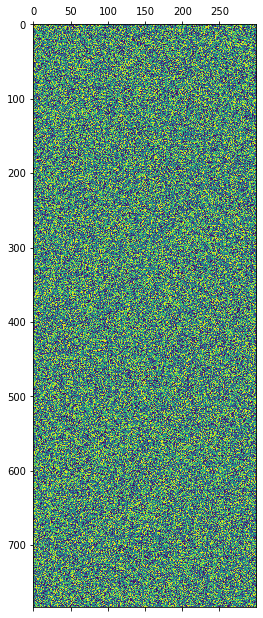

In [22]:
plt.matshow(ws)

In [23]:
ws.shape

(784, 300)

In [24]:
bs.shape

(300,)

### Compilação

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

### Treino

In [26]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid),batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 7s 3ms/step - loss: 0.7311 - accuracy: 0.7597 - val_loss: 0.5304 - val_accuracy: 0.8180
Epoch 2/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4924 - accuracy: 0.8297 - val_loss: 0.4876 - val_accuracy: 0.8287
Epoch 3/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4461 - accuracy: 0.8431 - val_loss: 0.4535 - val_accuracy: 0.8402
Epoch 4/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4195 - accuracy: 0.8525 - val_loss: 0.4671 - val_accuracy: 0.8341
Epoch 5/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3988 - accuracy: 0.8605 - val_loss: 0.4065 - val_accuracy: 0.8568
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3836 - accuracy: 0.8657 - val_loss: 0.3880 - val_accuracy: 0.8633
Epoch 7/30
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3695 - accuracy: 0.8701 - val_loss: 0.4436 - val_accuracy:

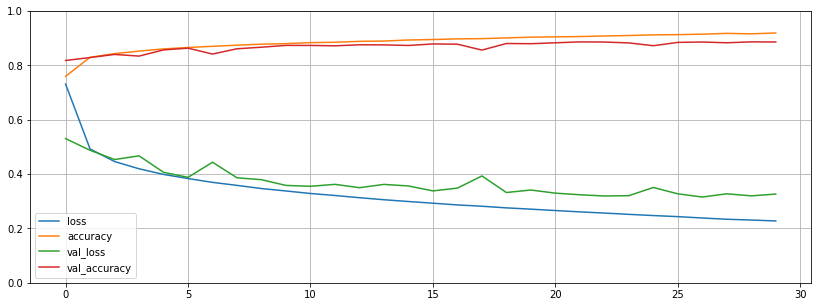

In [27]:
pd.DataFrame(history.history).plot(figsize=(14, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Teste

In [28]:
from tensorflow.python.ops import losses
eval_results = model.evaluate(X_test, y_test,batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 67.0542 - accuracy: 0.8507


In [29]:
print(f"Accuracia (test) : {eval_results[1]}")

Accuracia (test) : 0.8507000207901001


### Utilização

In [30]:
X_new = X_test[:6]
y_pred = model.predict(X_new)
classes_pred = np.argmax(y_pred, axis=1)
nomes_classes_pred = [class_names[i] for i in classes_pred] 

In [31]:
y_pred = model.predict(X_new)
y_pred
#[i for i,prob in enumerate(y_pred) if prob > 0.5]

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.7478333e-31, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.00

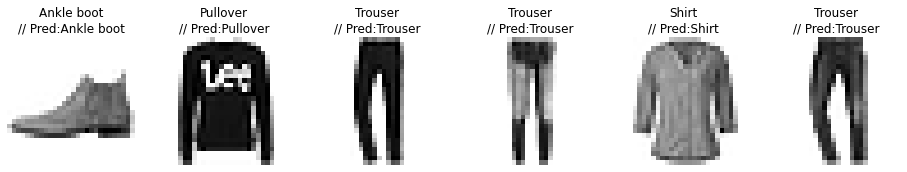

In [32]:
r=0
fig,axes = plt.subplots(nrows=1,ncols=6,figsize=(16,6))
for ax in axes:
    some_image =X_test[r].reshape(28,28)
    ax.imshow(X=some_image, cmap = mpl.cm.binary, interpolation="nearest")
    ax.set_title(class_names[y_test[r]]+ "\n// Pred:" +nomes_classes_pred[r])
    ax.axis("off")
    r+=1
#plt.axis("off")
plt.show()

### Salvando e carregando um modelo

In [33]:
model.save("mlp_fashion_mnist_keras_model.h5")

In [34]:
model_lido = keras.models.load_model("mlp_fashion_mnist_keras_model.h5")

In [35]:
model_lido.predict(X_new)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.7478333e-31, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.00

In [36]:
model.predict(X_new)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.7478333e-31, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.00

## Exemplo com IMDB (Chollet, Cap. 4)

### IMDB dataset

In [37]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)         

In [38]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)

(25000,)
(25000,)
(25000,)


In [39]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [40]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [41]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [42]:
print(train_labels[0])

1


#### Pre-processamento via multi-hot encoding

In [43]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.
  return results

In [44]:
x_train_enc = vectorize_sequences(train_data)
x_test_enc = vectorize_sequences(test_data)

In [45]:
x_train_enc.shape

(25000, 10000)

In [46]:
x_train_enc[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [47]:
y_train_enc = np.asarray(train_labels).astype("float32")
y_test_enc = np.asarray(test_labels).astype("float32")

In [48]:
y_train_enc[0]

1.0

#### Dataset para validação

In [49]:
x_val = x_train_enc[:10000]
partial_x_train = x_train_enc[10000:]
y_val = y_train_enc[:10000]
partial_y_train = y_train_enc[10000:]

In [50]:
partial_x_train.shape

(15000, 10000)

### Model

In [51]:
model = keras.Sequential([
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [52]:
x = np.linspace(-10,10,100)
y = keras.activations.sigmoid(x)

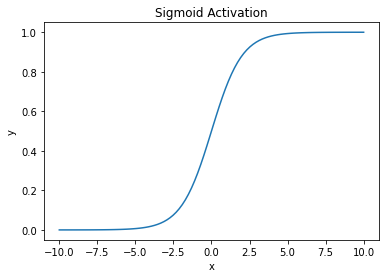

In [53]:
plt.plot(x,y)
plt.title("Sigmoid Activation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Compilação

In [54]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"]
)

### Treino

In [55]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val)
)

Epoch 1/15
30/30 [==============================] - 2s 38ms/step - loss: 0.5144 - accuracy: 0.7835 - val_loss: 0.3869 - val_accuracy: 0.8681
Epoch 2/15
30/30 [==============================] - 1s 19ms/step - loss: 0.3068 - accuracy: 0.9025 - val_loss: 0.3395 - val_accuracy: 0.8608
Epoch 3/15
30/30 [==============================] - 1s 19ms/step - loss: 0.2236 - accuracy: 0.9279 - val_loss: 0.2850 - val_accuracy: 0.8878
Epoch 4/15
30/30 [==============================] - 1s 19ms/step - loss: 0.1758 - accuracy: 0.9435 - val_loss: 0.3090 - val_accuracy: 0.8772
Epoch 5/15
30/30 [==============================] - 1s 19ms/step - loss: 0.1421 - accuracy: 0.9545 - val_loss: 0.2795 - val_accuracy: 0.8884
Epoch 6/15
30/30 [==============================] - 1s 19ms/step - loss: 0.1172 - accuracy: 0.9639 - val_loss: 0.2953 - val_accuracy: 0.8868
Epoch 7/15
30/30 [==============================] - 1s 19ms/step - loss: 0.0923 - accuracy: 0.9746 - val_loss: 0.3723 - val_accuracy: 0.8657
Epoch 8/15
30

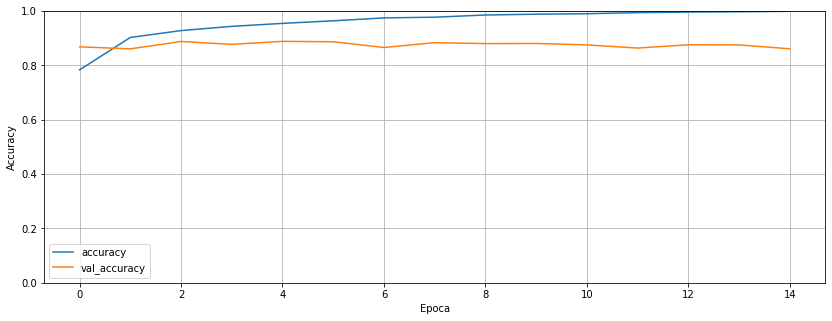

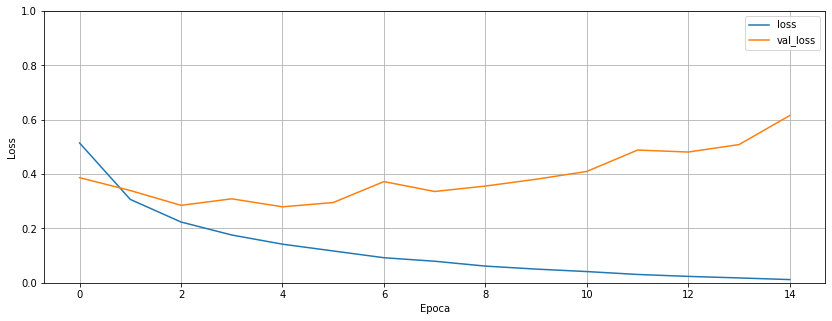

In [56]:
h = pd.DataFrame(history.history)
h[['accuracy','val_accuracy']].plot(figsize=(14, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("Epoca")
plt.ylabel("Accuracy")
h[['loss','val_loss']].plot(figsize=(14, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel("Epoca")
plt.ylabel("Loss")
plt.show()

Provavel overfit após 5 epocas

### Utilização

In [57]:
model.predict(x_test_enc)

array([[0.10535093],
       [0.99999905],
       [0.9989641 ],
       ...,
       [0.01333518],
       [0.05408457],
       [0.9800582 ]], dtype=float32)

# Referências
- Chollet (2021). _"Deep Learning with Python"_. 2nd. ed. Manning. 
- Geron (2019). _"Hands on Machine Learning with Scikit Learning and Keras"_. 2nd. ed. O'Reilly. 